In [146]:
#import some libraries needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import recall_score, accuracy_score, precision_score, \
f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
#read the csv dataset

df = pd.read_csv("Data_for_UCI_named.csv")

In [73]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [74]:
df.shape

(10000, 14)

In [75]:
df.stabf.unique()

array(['unstable', 'stable'], dtype=object)

In [76]:
#dropping stab variable

df = df.drop(columns=["stab"])

In [77]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [78]:
df["stabf"]

0       unstable
1         stable
2       unstable
3       unstable
4       unstable
          ...   
9995    unstable
9996      stable
9997      stable
9998    unstable
9999    unstable
Name: stabf, Length: 10000, dtype: object

In [79]:
#encode categorical variable

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["stabf"] = encoder.fit_transform(df["stabf"])

In [80]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


In [81]:
encoder.classes_

array(['stable', 'unstable'], dtype=object)

In [82]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1


In [83]:
X = df.drop(columns=["stabf"]) #defining the X features dataset (independent variable)

In [84]:
y = df["stabf"] #defining the target

In [85]:
X.shape, y.shape

((10000, 12), (10000,))

In [86]:
y.value_counts()

1    6380
0    3620
Name: stabf, dtype: int64

In [87]:
#split the data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [88]:
#transform the data using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #initialise the scaler

In [89]:
X_normal_train = scaler.fit(X_train)
X_normal_train = scaler.transform(X_train)

X_normal_train = pd.DataFrame(X_normal_train, columns=X_train.columns)

X_normal_test = X_test.reset_index(drop=True)
X_normal_test = scaler.transform(X_test)
X_normal_test = pd.DataFrame(X_normal_test, columns=X_test.columns)

In [90]:
X_normal_train.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575


In [91]:
X_normal_train.shape

(8000, 12)

# Random Forest Classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=2, random_state=1) #use 2 cores when possible

In [93]:
clf.fit(X_normal_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=1)

In [94]:
#making predictions on the test dataset

y_pred = clf.predict(X_normal_test)

In [95]:
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [96]:
y_proba = clf.predict_proba(X_normal_test) #predict probability

In [97]:
y_proba

array([[0.09, 0.91],
       [0.05, 0.95],
       [0.76, 0.24],
       ...,
       [0.74, 0.26],
       [0.5 , 0.5 ],
       [0.32, 0.68]])

In [98]:
#creating a confusion matrix

pd.crosstab(y_test, y_pred, rownames=["Actual Values"], colnames=["Predicted Values"])

Predicted Values,0,1
Actual Values,,
0,625,87
1,55,1233


In [38]:
#check the most important feautures
list(zip(X_normal_train.columns, clf.feature_importances_.round(4)))

[('tau1', 0.1244),
 ('tau2', 0.1263),
 ('tau3', 0.1221),
 ('tau4', 0.1214),
 ('p1', 0.0291),
 ('p2', 0.0314),
 ('p3', 0.03),
 ('p4', 0.0295),
 ('g1', 0.0908),
 ('g2', 0.0977),
 ('g3', 0.1003),
 ('g4', 0.097)]

In [39]:
sorted(clf.feature_importances_.round(4))

[0.0291,
 0.0295,
 0.03,
 0.0314,
 0.0908,
 0.097,
 0.0977,
 0.1003,
 0.1214,
 0.1221,
 0.1244,
 0.1263]

In [99]:
confusion_matrix(y_test, y_pred)

array([[ 625,   87],
       [  55, 1233]], dtype=int64)

In [100]:
accuracy_score(y_test, y_pred)

0.929

In [101]:
precision_score(y_test, y_pred)

0.9340909090909091

In [102]:
recall_score(y_test,y_pred)

0.9572981366459627

In [103]:
f1_score(y_test,y_pred)

0.9455521472392638

In [156]:
accuracy_score(y_test, y_pred).round(4)

0.929

# Extra Tree Classifier

In [40]:
from sklearn.tree import ExtraTreeClassifier

In [41]:
etc = ExtraTreeClassifier()

In [42]:
etc.fit(X_normal_train,y_train)

ExtraTreeClassifier()

In [43]:
y_pred_etc = etc.predict(X_normal_test)

In [44]:
y_pred_etc

array([0, 1, 0, ..., 0, 1, 1])

In [58]:
confusion_matrix(y_test, y_pred_etc)

array([[ 468,  244],
       [ 283, 1005]], dtype=int64)

In [141]:
accuracy_score(y_test, y_pred_etc)

0.7365

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       712
           1       0.93      0.96      0.95      1288

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [154]:
list(zip(X_normal_train.columns, etc.feature_importances_.round(4)))

[('tau1', 0.1173),
 ('tau2', 0.1152),
 ('tau3', 0.106),
 ('tau4', 0.1185),
 ('p1', 0.0408),
 ('p2', 0.042),
 ('p3', 0.0399),
 ('p4', 0.0415),
 ('g1', 0.0934),
 ('g2', 0.0915),
 ('g3', 0.1036),
 ('g4', 0.0904)]

In [152]:
sorted(etc.feature_importances_.round(4))

[0.0399,
 0.0408,
 0.0415,
 0.042,
 0.0904,
 0.0915,
 0.0934,
 0.1036,
 0.106,
 0.1152,
 0.1173,
 0.1185]

# XGBoost Classifier

In [59]:
import xgboost as xgb

In [134]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False)

In [136]:
xgb_model.fit(X_normal_train, y_train)

[05:38:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [137]:
y_pred_xgb = xgb_model.predict(X_normal_test) #making predictions

In [138]:
y_pred_xgb

array([1, 1, 0, ..., 0, 1, 1])

In [139]:
confusion_matrix(y_test, y_pred_xgb)

array([[ 648,   64],
       [  45, 1243]], dtype=int64)

In [140]:
accuracy_score(y_test, y_pred_xgb)

0.9455

In [145]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       712
           1       0.95      0.97      0.96      1288

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



# lightgbm model

In [115]:
import lightgbm as lgb

In [125]:
#load dataset into lightgbm
data = X_normal_train
label = y_train  # binary target

train_data = lgb.Dataset(data, label=label)
validation_data = lgb.Dataset(X_normal_test, label=y_test, reference=train_data)

param = {'num_leaves': 31, 'objective': 'binary'}
param['metric'] = ['auc', 'binary_logloss']

In [126]:
#train the model
num_round = 100
lgb_model = lgb.train(param, train_data, num_round, valid_sets=[validation_data])

[LightGBM] [Info] Number of positive: 5092, number of negative: 2908
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000699 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.636500 -> initscore=0.560205
[LightGBM] [Info] Start training from score 0.560205
[1]	valid_0's auc: 0.877141	valid_0's binary_logloss: 0.608671
[2]	valid_0's auc: 0.907176	valid_0's binary_logloss: 0.574384
[3]	valid_0's auc: 0.924718	valid_0's binary_logloss: 0.542493
[4]	valid_0's auc: 0.93089	valid_0's binary_logloss: 0.516406
[5]	valid_0's auc: 0.941375	valid_0's binary_logloss: 0.491765
[6]	valid_0's auc: 0.94439	valid_0's binary_logloss: 0.471908
[7]	valid_0's auc: 0.948611	valid_0's binary_logloss: 0.452119
[8]	valid_0's auc: 0.951434	valid_0's binary_logloss: 0.435018
[9]	va

In [127]:
y_pred_lgb = lgb_model.predict(X_normal_test)

In [128]:
print(y_pred_lgb)

[0.99154728 0.99116598 0.02086899 ... 0.04873503 0.58191944 0.92524808]


In [129]:
for prediction in y_pred_lgb:
    print(prediction)

0.9915472815606889
0.9911659769897818
0.020868987167236962
0.022599874791573143
0.9944471149059287
0.08332119682763353
0.997954318085473
0.9669139877483472
0.8390097408247202
0.021348248170943357
0.9987003184417863
0.032649429949574295
0.8730969637812409
0.035959844677649656
0.9968771953077311
0.942867024702245
0.9845302202477618
0.9774370443281555
0.02604192647886772
0.018303174020822256
0.0609816489585034
0.4605210880891786
0.9993341074075613
0.9315526397961014
0.5785813933072742
0.9995491199549137
0.9755323604620981
0.17380767896032276
0.8457882936915041
0.5234021288958087
0.9988124759968809
0.8597962354236319
0.9988950360089426
0.4467304981852061
0.9985873263290816
0.058056650460362236
0.9995477543728799
0.8737448236568164
0.6480731868871515
0.14976697437447914
0.999362966588229
0.3901465568599424
0.9752840611331397
0.9789477889547871
0.06575938414583896
0.993038308264875
0.9992630453561865
0.9911220895076528
0.024183010889660704
0.9983775851175506
0.9995084184850547
0.012891045370

0.6957407968231653
0.9996258122941074
0.07861449616899334
0.6409633510035746
0.9141927070784007
0.9897496354713986
0.9921279179158249
0.9614562881470892
0.9962882008075308
0.9814535639493632
0.03004493398196996
0.9097935518340344
0.9991656601110792
0.931795363880311
0.9995251184361382
0.6604073962929402
0.9911254122024975
0.9964001735028555
0.9945543553753122
0.26584657977603254
0.997897648479271
0.2424998744401613
0.743072358449937
0.9991091940226816
0.9856769934027119
0.9991241779013965
0.18955554960214113
0.9687546056613713
0.2338027061911193
0.968020955963247
0.8027631870307183
0.9831647845385401
0.7837858188260218
0.9898943393362077
0.9993306257040666
0.993591461733135
0.9884872632706082
0.15654017853328078
0.4440248223412919
0.3281346161393482
0.7903913944640806
0.13454298131544068
0.7835220346645971
0.9271640624617203
0.9312977207750267
0.01232994666365847
0.47892256165110014
0.750938657809614
0.009568689018020052
0.9802440465102354
0.9938845923439086
0.009435532214572898
0.0181

In [130]:
#rounding the values
y_pred_lgb=y_pred_lgb.round(0)
#converting from float to integer
y_pred_lgb=y_pred_lgb.astype(int)

In [131]:
confusion_matrix(y_test, y_pred_lgb)

array([[ 641,   71],
       [  50, 1238]], dtype=int64)

In [132]:
#roc_auc_score metric
roc_auc_score(y_test,y_pred_lgb)

0.9307305115500035

In [133]:
accuracy_score(y_test,y_pred_lgb)

0.9395

Text(0, 0.5, 'True positive rate')

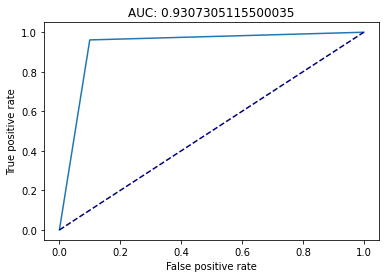

In [149]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lgb, pos_label=1)

auc = roc_auc_score(y_test, y_pred_lgb)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], color='navy', linestyle='--', label='random')
plt.title(f'AUC: {auc}')
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')

new ext

In [161]:
etc2 = ExtraTreeClassifier()
#etc2.fit(X_normal_train,y_train)
#y_pred_etc = etc2.predict(X_normal_test)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(etc2, X_normal_train, y_train, cv= 5 , scoring = 'accuracy', 
                         n_jobs = -1, verbose = 1)
scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished


array([0.759375, 0.756875, 0.73875 , 0.763125, 0.740625])

In [160]:
scores.mean()

0.7472500000000001